In [1]:
# Import libraries
import pandas as pd
import numpy as np
import cpi
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for regression
# import statsmodels.formula.api as sm
# import statsmodels.api as sm1
# from statsmodels.sandbox.regression.gmm import IV2SLS
# from statsmodels.api import add_constant
# from linearmodels.iv import IV2SLS
# from linearmodels.iv import compare

/Users/haivanle/Documents/AEA/.conda/lib/python3.10/site-packages/cpi/__init__.py:42: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


In [2]:
# Read files / Load datasets
execu500 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp500fullvariables.csv')
execu400 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp400fullvariables.csv')
execu600 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp600fullvariables.csv')
sp500 = pd.read_csv('/Users/haivanle/Documents/AEA/sp500afull.csv')
sp400 = pd.read_csv('/Users/haivanle/Documents/AEA/sp400afull.csv')
sp600 = pd.read_csv('/Users/haivanle/Documents/AEA/sp600afull.csv')

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_15773/1033888710.py:2: DtypeWarning: Columns (77,80,96) have mixed types. Specify dtype option on import or set low_memory=False.
  execu500 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp500fullvariables.csv')
/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_15773/1033888710.py:3: DtypeWarning: Columns (77,80,96) have mixed types. Specify dtype option on import or set low_memory=False.
  execu400 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp400fullvariables.csv')
/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_15773/1033888710.py:4: DtypeWarning: Columns (77,80,96) have mixed types. Specify dtype option on import or set low_memory=False.
  execu600 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp600fullvariables.csv')
/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_15773/1033888710.py:5: DtypeWarning: Columns (26,30,969,970,980) have mixed types. Specify dtype option on import or set l

In [3]:
# Rename key columns
sp500 = sp500.rename(columns={"fyear": "YEAR", "tic": "TICKER"})
sp400 = sp500.rename(columns={"fyear": "YEAR", "tic": "TICKER"})
sp600 = sp500.rename(columns={"fyear": "YEAR", "tic": "TICKER"})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


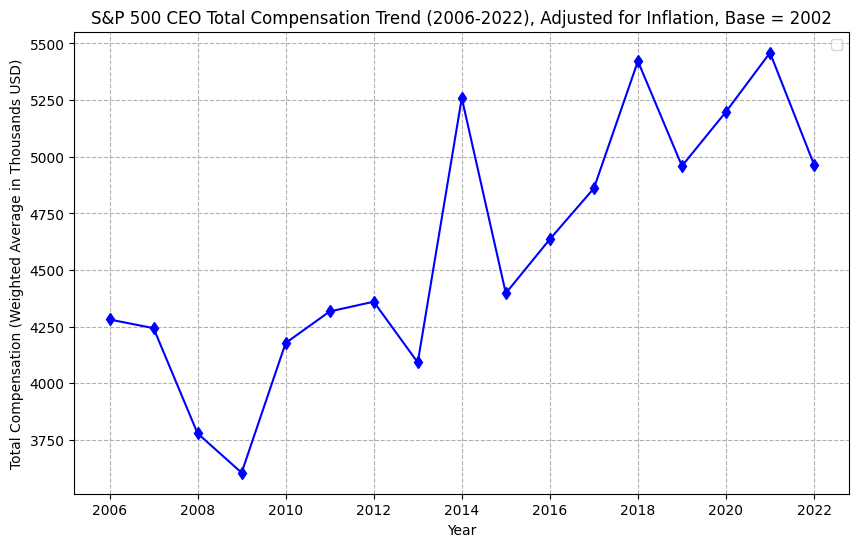

In [31]:
execu500['Adjusted_Compensation'] = execu500.apply(
    lambda row: cpi.inflate(row['TOTAL_SEC'], row['YEAR'], to=2002), axis=1
)

# Calculate weighted average per year
compensation_trend = execu500.groupby('YEAR')['Adjusted_Compensation'].mean() 

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(compensation_trend.index, compensation_trend.values, color='blue', marker = 'd')
    
# Add title and labels
plt.title("S&P 500 CEO Total Compensation Trend (2006-2022), Adjusted for Inflation, Base = 2002")
plt.xlabel("Year")
plt.ylabel("Total Compensation (Weighted Average in Thousands USD)")
plt.grid(True, which='both', linestyle='--')
plt.legend()

# Show plot
plt.savefig('comptrend.pdf', format="pdf", bbox_inches="tight")
plt.show()

In [4]:
# Combine executive data
df = pd.concat([execu500, execu400, execu600])
df['stockoptions'] = df['STOCK_AWARDS'] + df['OPTION_AWARDS']

df['ratio_stock_options'] = df['stockoptions']/df['TOTAL_SEC']*100

df['adjusted_TC'] = df.apply(
    lambda row: cpi.inflate(row['TOTAL_SEC'], row['YEAR'], to=2002), axis=1
)

# Change to million
df['adjusted_TC'] = df['adjusted_TC'] / 1000 
# Drop rows with negative compensation
df = df[(df['adjusted_TC']>0)]

# Keep only CEOs data
ceo = df[(df['CEOANN'] == 'CEO')]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


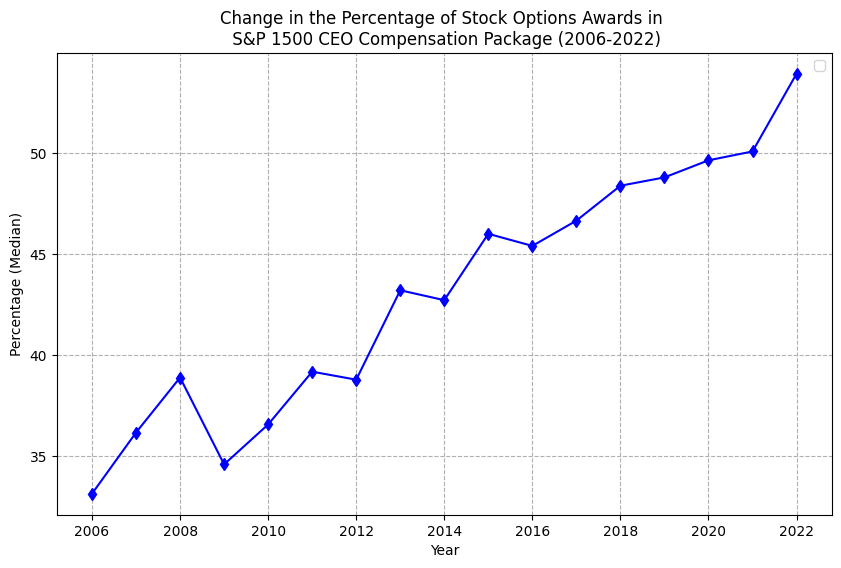

In [32]:
# Calculate weighted average per year
compensation_trend = df.groupby('YEAR')['ratio_stock_options'].median() 

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(compensation_trend.index, compensation_trend.values, color='blue', marker = 'd')
    
# Add title and labels
plt.title("Change in the Percentage of Stock Options Awards in \n S&P 1500 CEO Compensation Package (2006-2022)")
plt.xlabel("Year")
plt.ylabel("Percentage (Median)")
plt.grid(True, which='both', linestyle='--')
plt.legend()

# Show plot
plt.savefig('stockoptionsratio.pdf', format="pdf", bbox_inches="tight")
plt.show()

In [5]:
df[["adjusted_TC", "ratio_stock_options"]].describe()

,adjusted_TC,ratio_stock_options
count,1.207080e+05,120708.000000
mean,2.775010e+00,43.444329
std,7.634941e+00,158.734437
min,6.147170e-07,-496.680545
25%,7.996256e-01,27.351721
50%,1.547938e+00,43.913942
75%,3.147780e+00,59.625158
max,1.636353e+03,54439.120998


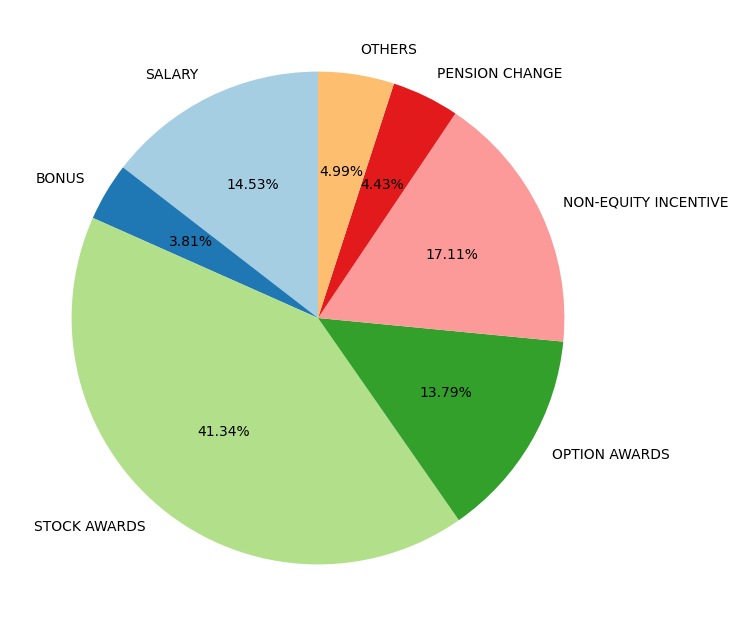

In [33]:
# Summing each component across all rows
components = ['SALARY', 'BONUS', 'STOCK_AWARDS', 'OPTION_AWARDS', 
              'NONEQ_INCENT', 'PENSION_CHG', 'OTHCOMP']
component_sums = df[components].sum()

# largest_idx = component_sums.idxmax()
# explode = [0.2 if i == largest_idx else 0 for i in component_sums.index]
new_components = ['SALARY', 'BONUS', 'STOCK AWARDS', 'OPTION AWARDS', 'NON-EQUITY INCENTIVE', 'PENSION CHANGE', 'OTHERS']
# Define pastel colors
pastel_colors = ['#FF6F61', '#FFB347', '#FDFD96', '#77DD77', '#AEC6CF', '#CFCFC4', '#FFB7D5']

# Create a pie chart
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(component_sums, labels = new_components, autopct=lambda p: f'{p:.2f}%', startangle=90, colors=sns.color_palette('Paired'))

# ax.legend(new_components, loc='center right')
# plt.title('Compensation Package for S&P 1500 CEOs')
plt.savefig('compensation.pdf', format="pdf", bbox_inches="tight")
plt.show()

In [6]:
# Get the year that executive became CEO
ceo['dateceo'] = pd.to_datetime(ceo['BECAMECEO'])
ceo['yearceo'] = ceo['dateceo'].dt.year

# Get the tenure of CEOs - defined as : year of data observation - yearbecame ceo
ceo['tenure'] = (ceo['YEAR'].astype(float) - ceo['yearceo'])

# Drop negative tenures
ceo_tenure = ceo[(ceo['tenure'] > 0)]

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_15773/2882941134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceo['dateceo'] = pd.to_datetime(ceo['BECAMECEO'])
/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_15773/2882941134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceo['yearceo'] = ceo['dateceo'].dt.year
/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_15773/2882941134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [7]:
''' Detect outliers in compensation '''

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1a = ceo_tenure['adjusted_TC'].quantile(0.25)
Q3a = ceo_tenure['adjusted_TC'].quantile(0.75)
IQRa = Q3a - Q1a
lowera = Q1a - 1.5*IQRa
uppera = Q3a + 1.5*IQRa
 
# Removing the outliers
ceo_tenure = ceo_tenure.loc[(ceo_tenure['adjusted_TC'] < uppera) & (ceo_tenure['adjusted_TC'] > lowera) ]

In [8]:
''' Detect outliers in tenure '''
# IQR
# Calculate the upper and lower limits
Q1_t = ceo_tenure['tenure'].quantile(0.25)
Q3_t = ceo_tenure['tenure'].quantile(0.75)
IQR_t = Q3_t - Q1_t
lower_t = Q1_t - 1.5*IQR_t
upper_t = Q3_t + 1.5*IQR_t
 
# Removing the outliers
ceo_tenure = ceo_tenure.loc[(ceo_tenure['tenure']< upper_t) & (ceo_tenure['tenure'] > lower_t) ]

In [9]:
ceo_tenure[["adjusted_TC", "tenure"]].describe()

,adjusted_TC,tenure
count,1.793700e+04,17937.000000
mean,4.899599e+00,6.974466
std,3.605472e+00,5.228724
min,6.951018e-07,1.000000
25%,2.062346e+00,3.000000
50%,3.996403e+00,6.000000
75%,6.965184e+00,10.000000
max,1.575406e+01,22.000000


In [10]:
ceo_tenure.loc[(ceo_tenure['ratio_stock_options']< 100) & (ceo_tenure['ratio_stock_options'] > 0) ].describe()

,EXECDIR,OLD_DATAFMT_FLAG,INTERLOCK,REPRICE,EXECRANK,CO_PER_ROL,SALARY,BONUS,STOCK_AWARDS,OPTION_AWARDS,...,SUB_TELE,NAICS,SPINDEX,SIC,stockoptions,ratio_stock_options,adjusted_TC,dateceo,yearceo,tenure
count,16306.000000,16306.0,16306.0,16306.0,135.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,...,15718.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306,16306.000000,16306.000000
mean,0.971974,0.0,0.0,0.0,1.577778,39075.981663,874.308861,142.797734,3181.938880,968.337393,...,560.791513,389013.832086,3363.330063,4769.544585,4150.276273,53.677758,5.236973,2008-03-31 19:40:00.735925504,2007.866675,6.858089
min,0.000000,0.0,0.0,0.0,1.000000,79.000000,0.000000,0.000000,-7230.189000,0.000000,...,31.000000,42.000000,1010.000000,100.000000,0.257000,0.018230,0.031582,1984-01-01 00:00:00,1984.000000,1.000000
25%,1.000000,0.0,0.0,0.0,1.000000,27563.000000,639.005750,0.000000,799.215000,0.000000,...,314.000000,325414.000000,2020.000000,3510.000000,1405.536250,40.446073,2.451665,2003-09-09 00:00:00,2003.000000,3.000000
50%,1.000000,0.0,0.0,0.0,1.000000,37823.000000,859.635000,0.000000,2221.825500,134.433500,...,603.000000,339112.000000,3510.000000,4911.000000,3170.798000,55.541964,4.354757,2008-04-01 00:00:00,2008.000000,5.000000
75%,1.000000,0.0,0.0,0.0,1.000000,51752.000000,1050.000000,0.000000,4577.727000,1412.512250,...,781.000000,522298.000000,4510.000000,6311.000000,5968.300500,68.150029,7.303473,2013-12-19 00:00:00,2013.000000,10.000000
max,1.000000,0.0,0.0,0.0,7.000000,70190.000000,5000.000000,10400.958000,22150.441000,17000.000000,...,989.000000,999977.000000,6020.000000,9997.000000,22150.441000,99.999992,15.754060,2021-12-31 00:00:00,2021.000000,22.000000
std,0.165054,0.0,0.0,0.0,1.284039,16813.476796,345.030535,594.684782,3178.742786,1595.691558,...,248.691902,166133.995023,1375.199031,1833.266723,3538.347081,19.552481,3.552567,NaN,7.004052,5.131008


In [11]:
ceo_tenure = ceo_tenure.loc[(ceo_tenure['ratio_stock_options']< 100) & (ceo_tenure['ratio_stock_options'] > 0) ]
ceo_tenure

,EXEC_FULLNAME,CFOANN,EXECDIR,OLD_DATAFMT_FLAG,INTERLOCK,REPRICE,EXECRANK,CO_PER_ROL,CONAME,TITLEANN,...,SUB_TELE,NAICS,SPINDEX,SIC,stockoptions,ratio_stock_options,adjusted_TC,dateceo,yearceo,tenure
91,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,682.0,481111,2030,4512,9410.276,92.248030,9.103028,2003-04-25,2003.0,3.0
97,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,682.0,481111,2030,4512,5895.570,86.162412,5.936792,2003-04-25,2003.0,4.0
102,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,682.0,481111,2030,4512,4391.020,83.021225,4.419339,2003-04-25,2003.0,5.0
107,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"Chairman, Chief Executive Officer, President, ...",...,682.0,481111,2030,4512,3951.910,70.181293,4.721877,2003-04-25,2003.0,6.0
112,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,Chairman and Chief Executive Officer,...,682.0,481111,2030,4512,4466.620,75.035509,4.911061,2003-04-25,2003.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55728,John C. Hadjipateras,NaN,1,0,0,0,NaN,63143,DORIAN LPG LTD,"Chairman of the Board, President & CEO",...,203.0,483111,1010,4412,794.363,33.667467,1.566457,2013-07-01,2013.0,8.0
55743,Antonio Carrillo,NaN,1,0,0,0,NaN,61546,ARCOSA INC,"President, CEO & Director",...,972.0,332312,2010,3440,3367.702,58.334560,4.062386,2018-11-01,2018.0,1.0
55749,Antonio Carrillo,NaN,1,0,0,0,NaN,61546,ARCOSA INC,"President, CEO & Director",...,972.0,332312,2010,3440,3463.309,63.639167,3.782816,2018-11-01,2018.0,2.0
55755,Antonio Carrillo,NaN,1,0,0,0,NaN,61546,ARCOSA INC,"President, CEO & Director",...,972.0,332312,2010,3440,3679.401,65.326167,3.739383,2018-11-01,2018.0,3.0


In [12]:
# Combine financial data
df2 = pd.concat([sp500, sp400, sp600])

In [13]:
# Component of Altman's Z-score for public companies
df2['X1'] = (df2['act'] - df2['lct']) / df2['at']
df2['X2'] = df2['re'] / df2['at']
df2['X3'] = df2['ebit'] / df2['at']
df2['X4'] = df2['prcc_f'] * df2['csho'] / df2['lt']
df2['X5'] = df2['sale'] / df2['at']

# Calculate Z-score
df2['zscore'] = 1.2*df2['X1'] + 1.4*df2['X2'] + 3.3*df2['X3'] + 0.6*df2['X4'] + 1.0*df2['X5']

In [14]:
df2['emp'].describe()

count    46404.000000
mean        43.040830
std        104.980433
min          0.000000
25%          5.000000
50%         14.577000
75%         43.000000
max       2300.000000
Name: emp, dtype: float64

In [15]:
# Merge executive data with firm's financial data
secondstage = ceo_tenure.merge(df2, on = ['YEAR', 'TICKER'], how = 'left')

In [16]:
# Read Chicago Board Momemtum Data - Volatility Index and FAMA
CBVIXFAMA = pd.read_csv('/Users/haivanle/Documents/AEA/CBVIX.csv') 

In [17]:
secondstage = secondstage.merge(CBVIXFAMA, on = ['YEAR'], how = 'left')

In [18]:
# Create dummies for policies
# TARP's Pay Czar : 2009-2010
# Dodd Frank Act : 2010 - present
# SOX : 2002 - present

# If the year is 2009-2010, the value is 1, otherwise, it is 0
secondstage['payczar'] = np.where((secondstage['YEAR'] == 2009.0) | (secondstage['YEAR'] == 2010.0), 1, 0)

# If the year is 2010-2022, the value is 1, otherwise, it is 0
secondstage['doddfrank'] = np.where((secondstage['YEAR'] == 2010.0) | (secondstage['YEAR'] == 2011.0) | 
                                    (secondstage['YEAR'] == 2012.0) |
                                    (secondstage['YEAR'] == 2013.0) | (secondstage['YEAR'] == 2014.0) | 
                                    (secondstage['YEAR'] == 2015.0) | (secondstage['YEAR'] == 2016.0) |
                                    (secondstage['YEAR'] == 2017.0) | (secondstage['YEAR'] == 2018.0) |
                                    (secondstage['YEAR'] == 2019.0) | (secondstage['YEAR'] == 2020.0) |
                                    (secondstage['YEAR'] == 2021.0) | (secondstage['YEAR'] == 2022.0), 1, 0) 

In [19]:
secondstage['zscore'].describe()

count    14238.000000
mean         4.147880
std          4.160299
min        -11.967550
25%          1.871784
50%          3.223009
75%          4.885132
max         55.433156
Name: zscore, dtype: float64

In [20]:
secondstage.to_csv('/Users/haivanle/Documents/AEA/zscore2024v2.csv') 

In [21]:
# Read stock data
stockreturn = pd.read_csv('/Users/haivanle/Documents/AEA/stockreturnclean.csv')

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_15773/3797098431.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  stockreturn = pd.read_csv('/Users/haivanle/Documents/AEA/stockreturnclean.csv')


In [22]:
# Merge executive data with firm's financial data
stockemp = ceo_tenure.merge(df2[['YEAR', 'TICKER', 'emp']], on = ['YEAR', 'TICKER'], how = 'left')
stockemp.head()

,EXEC_FULLNAME,CFOANN,EXECDIR,OLD_DATAFMT_FLAG,INTERLOCK,REPRICE,EXECRANK,CO_PER_ROL,CONAME,TITLEANN,...,NAICS,SPINDEX,SIC,stockoptions,ratio_stock_options,adjusted_TC,dateceo,yearceo,tenure,emp
0,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,481111,2030,4512,9410.276,92.248030,9.103028,2003-04-25,2003.0,3.0,86.6
1,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,481111,2030,4512,9410.276,92.248030,9.103028,2003-04-25,2003.0,3.0,86.6
2,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,481111,2030,4512,9410.276,92.248030,9.103028,2003-04-25,2003.0,3.0,86.6
3,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,481111,2030,4512,5895.570,86.162412,5.936792,2003-04-25,2003.0,4.0,85.5
4,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,481111,2030,4512,5895.570,86.162412,5.936792,2003-04-25,2003.0,4.0,85.5


In [23]:
# Change merge style
stockiv = stockemp.merge(stockreturn, on = ['YEAR', 'TICKER'], how = 'left')

In [24]:
stockiv

,EXEC_FULLNAME,CFOANN,EXECDIR,OLD_DATAFMT_FLAG,INTERLOCK,REPRICE,EXECRANK,CO_PER_ROL,CONAME,TITLEANN,...,spread,altprcdt,retx,vwretd,vwretx,ewretd,ewretx,sprtrn,std_dev,annualized_sd
0,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31133,John C. Hadjipateras,NaN,1,0,0,0,NaN,63143,DORIAN LPG LTD,"Chairman of the Board, President & CEO",...,NaN,12/31/2021,0.030869,0.033341,0.031573,-0.001760,-0.004799,0.043613,0.080177,4.494946
31134,Antonio Carrillo,NaN,1,0,0,0,NaN,61546,ARCOSA INC,"President, CEO & Director",...,NaN,11/29/2019,0.020828,0.034999,0.032986,0.026601,0.024938,0.034047,0.086753,4.675648
31135,Antonio Carrillo,NaN,1,0,0,0,NaN,61546,ARCOSA INC,"President, CEO & Director",...,NaN,3/31/2020,-0.074953,-0.141733,-0.143685,-0.207503,-0.209773,-0.125119,0.067098,4.112008
31136,Antonio Carrillo,NaN,1,0,0,0,NaN,61546,ARCOSA INC,"President, CEO & Director",...,NaN,3/31/2021,0.147365,0.030573,0.029086,0.012449,0.010736,0.042439,0.065985,4.077781


In [25]:
stockiv = stockiv.merge(CBVIXFAMA, on = ['YEAR'], how = 'left')
# Create dummies for policies
# TARP's Pay Czar : 2009-2010
# Dodd Frank Act : 2010 - present
# SOX : 2002 - present

# If the year is 2009-2010, the value is 1, otherwise, it is 0
stockiv['payczar'] = np.where((stockiv['YEAR'] == 2009) | (stockiv['YEAR'] == 2010), 1, 0)

# If the year is 2010-2022, the value is 1, otherwise, it is 0
stockiv['doddfrank'] = np.where((stockiv['YEAR'] == 2010) | (stockiv['YEAR'] == 2011) | 
                                    (stockiv['YEAR'] == 2012) |
                                    (stockiv['YEAR'] == 2013) | (stockiv['YEAR'] == 2014) | 
                                    (stockiv['YEAR'] == 2015) | (stockiv['YEAR'] == 2016) |
                                    (stockiv['YEAR'] == 2017) | (stockiv['YEAR'] == 2018) |
                                    (stockiv['YEAR'] == 2019) | (stockiv['YEAR'] == 2020) |
                                    (stockiv['YEAR'] == 2021) | (stockiv['YEAR'] == 2022), 1, 0) 

In [26]:
stockiv['annualized_sd'].describe()

count    28977.000000
mean         4.589718
std          1.240478
min          0.000000
25%          3.730746
50%          4.374728
75%          5.195621
max         31.284460
Name: annualized_sd, dtype: float64

In [27]:
stockiv.to_csv('/Users/haivanle/Documents/AEA/stockvol2024v2.csv') 